Lableing of the columns in the DOSCAR file containing Total and Partial (site and orbital projected) DOSs.

Below is given the dictionary that associates orbital labels to pdos columns in a DOSCAR file. The definition of this dictionary is the one used in the VaspDos class in the ASE VASP calculator, development version (Oct 19, 2013)

Spin-unpolarized case:

norb = {'s':1, 'py':2, 'pz':3, 'px':4, 'dxy':5, 'dyz':6, 'dz2':7, 'dxz':8, 'dx2':9}

Spin-polarized case:

norb = {'s+':1, 's-up':1, 's-':2, 's-down':2, 'py+':3, 'py-up':3, 'py-':4, 'py-down':4,'pz+':5, 'pz-up':5, 'pz-':6, 'pz-down':6, 'px+':7, 'px-up':7, 'px-':8, 'px-down':8,'dxy+':9, 'dxy-up':9, 'dxy-':10, 'dxy-down':10,'dyz+':11, 'dyz-up':11, 'dyz-':12, 'dyz-down':12,'dz2+':13, 'dz2-up':13, 'dz2-':14, 'dz2-down':14,'dxz+':15, 'dxz-up':15, 'dxz-':16, 'dxz-down':16,'dx2+':17, 'dx2-up':17, 'dx2-':18, 'dx2-down':18}

In [1]:
%matplotlib inline
import pylab
import numpy as np
import os

from ase import Atoms
from ase.io import read
from ase.calculators.vasp import Vasp
from ase.calculators.vasp import VaspDos


In [2]:
project_root = './'

systems = ['mcl.dir/'] 

working_folder = project_root + '/' + systems[0]

os.chdir(working_folder)

In [3]:
#outcar_file = working_folder+'/'+'OUTCAR'
#doscar_file = working_folder+'/'+'DOSCAR'

outcar_file = 'OUTCAR'
doscar_file = 'DOSCAR'


# Read the Fermi level from the OUTCAR file of the current calculation

E_f=None
for line in open(outcar_file, 'r'):
    if line.rfind('E-fermi') > -1:
        E_f=float(line.split()[2])
E_f


#with jasp('./',atoms=struct) as calc:

4.031

In [4]:
# Import the total and orbital-projected density of states in the through the VaspDos 
# class. This class creates objects that hold total and site DOSs as properties that
# are accessible as the following properties: efermi (Fermi level), energy (numpy array
# of energies), dos (numpy array holding the total DOS). The site_dos() methods allow one
# to access the site projected DOS

print(E_f)

dos = VaspDos(doscar='DOSCAR',efermi=E_f)

energies = dos.energy

nedos = np.size(energies)
cont = np.zeros(nedos)

#print np.shape(dos.dos)

4.031


Text(0,0.5,'DOS')

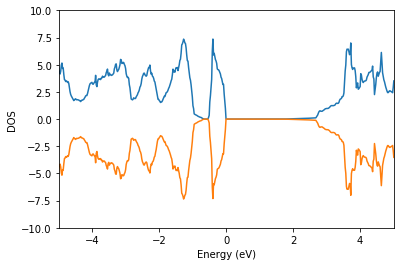

In [5]:
# Step 1: Plot the Total Density of States

pylab.plot(energies, dos.dos[0,:])
pylab.plot(energies, -dos.dos[1,:])
#pylab.xlabel('Energy - $E_f$ (eV)')
pylab.xlim((-5,5))
pylab.ylim((-10,10))
pylab.xlabel('Energy (eV)')
pylab.ylabel('DOS')

In [6]:
# Step 2: prepare the files containing the site and orbital projected DOS


p_orb_up = ['px+','py+','pz+']
d_orb_up = ['dxy+','dyz+','dxz+','dz2+','dx2+']
#
t2g_up = ['dxy+','dyz+','dxz+']
eg_up = ['dz2+','dx2+']
#f_orb_up = ['f1+','f2+','f3+','f4+','f5+','f6+','f7+']

p_orb_dw = ['px-','py-','pz-']
d_orb_dw = ['dxy-','dyz-','dxz-','dz2-','dx2-']
#
t2g_dw = ['dxy-','dyz-','dxz-']
eg_dw = ['dz2-','dx2-']
#f_orb_dw = ['f1-','f2-','f3-','f4-','f5-','f6-','f7-']

A_species = 'Fe'
#B_species = 'Ru'
X_species = 'O'


A_s = []
A_p = []
A_d = []
#A_f = []

#B_s = []
#B_p = []
#B_d = []
#B_f = []

X_s = []
X_p = []
X_d = []
#X_f = []

A_sites = range(0,4)
A_sites_spin_up = range(0,2)
A_sites_spin_dw = range(2,4)

#B_sites = range(32,20)
X_sites = range(4,8)

#print len(Pr_sites),len(Ru_sites),len(Ge_sites)

A_dos = {}
A_dos_sites_spin_up = {}
#B_dos = {}
X_dos = {}

###############################################
# Analyze d orbitals - AFM conf
###############################################
# t2g components
#
cont = np.zeros(nedos)
for site in A_sites_spin_up:
    for orb in t2g_up:
        cont = cont + dos.site_dos(site,orb)
A_dos_sites_spin_up['t2g+'] =cont/len(A_sites_spin_up)

cont = np.zeros(nedos)
for site in A_sites_spin_up:
    for orb in t2g_dw:
        cont = cont + dos.site_dos(site,orb)
A_dos_sites_spin_up['t2g-'] =cont/len(A_sites_spin_up)
#
###############################################
# eg components
#
cont = np.zeros(nedos)
for site in A_sites_spin_up:
    for orb in eg_up:
        cont = cont + dos.site_dos(site,orb)
A_dos_sites_spin_up['eg+'] =cont/len(A_sites_spin_up)

cont = np.zeros(nedos)
for site in A_sites_spin_up:
    for orb in eg_dw:
        cont = cont + dos.site_dos(site,orb)
A_dos_sites_spin_up['eg-'] =cont/len(A_sites_spin_up)

###############################################
# Analyze s orbitals
###############################################
# s spin up
cont = np.zeros(nedos)
for site in A_sites:
    cont = cont + dos.site_dos(site,'s+')
A_dos['s+'] =cont/len(A_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    cont = cont + dos.site_dos(site,'s+')
#B_dos['s+'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    cont = cont + dos.site_dos(site,'s+')
X_dos['s+'] = cont#/len(Ge_sites)

###############################################
# s spin dw
cont = np.zeros(nedos)
for site in A_sites:
    cont = cont + dos.site_dos(site,'s-')
A_dos['s-'] =cont/len(A_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    cont = cont + dos.site_dos(site,'s-')
#B_dos['s-'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    cont = cont + dos.site_dos(site,'s-')
X_dos['s-'] = cont#/len(Ge_sites)


###############################################
# Analyze p orbitals
###############################################
# p spin up
cont = np.zeros(nedos)
for site in A_sites:
    for orb in p_orb_up:
        cont = cont + dos.site_dos(site,orb)
A_dos['p+'] =cont#/len(Pr_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    for orb in p_orb_up:
#        cont = cont + dos.site_dos(site,orb)
#B_dos['p+'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    for orb in p_orb_up:
        cont = cont + dos.site_dos(site,orb)
X_dos['p+'] = cont#/len(Ge_sites)

###############################################
# p spin dw
cont = np.zeros(nedos)
for site in A_sites:
    for orb in p_orb_dw:
        cont = cont + dos.site_dos(site,orb)
A_dos['p-'] =cont#/len(Pr_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    for orb in p_orb_dw:
#        cont = cont + dos.site_dos(site,orb)
#B_dos['p-'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    for orb in p_orb_dw:
        cont = cont + dos.site_dos(site,orb)
X_dos['p-'] = cont#/len(Ge_sites)

###############################################
# Analyze d orbitals
###############################################
# d spin up
cont = np.zeros(nedos)
for site in A_sites:
    for orb in d_orb_up:
        cont = cont + dos.site_dos(site,orb)
A_dos['d+'] =cont#/len(Pr_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    for orb in d_orb_up:
#        cont = cont + dos.site_dos(site,orb)
#B_dos['d+'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    for orb in d_orb_up:
        cont = cont + dos.site_dos(site,orb)
X_dos['d+'] = cont#/len(Ge_sites)


###############################################
# d spin dw
cont = np.zeros(nedos)
for site in A_sites:
    for orb in d_orb_dw:
        cont = cont + dos.site_dos(site,orb)
A_dos['d-'] =cont#/len(Pr_sites)

#cont = np.zeros(nedos)
#for site in B_sites:
#    for orb in d_orb_dw:
#        cont = cont + dos.site_dos(site,orb)
#B_dos['d-'] =cont#/len(Ru_sites)
    
cont = np.zeros(nedos)
for site in X_sites:
    for orb in d_orb_dw:
        cont = cont + dos.site_dos(site,orb)
X_dos['d-'] = cont#/len(Ge_sites)


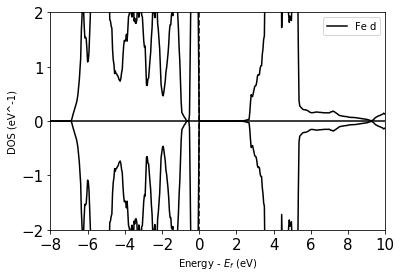

<class 'numpy.ndarray'>


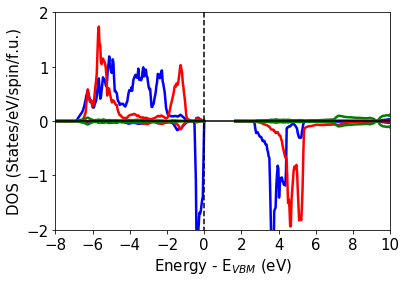

In [7]:
xmin = -8
xmax =  10
xstep = 2

ymin = -2
ymax =  2
ystep = 1

xaxis_ticks = range(xmin,xmax+xstep,xstep)
yaxis_ticks = range(ymin,ymax+ystep,ystep)

################################################################################

compound = 'FeO'
calculation = 'FeO_mcl'

################################################################################
pylab.xlim((xmin,xmax))
pylab.ylim((ymin,ymax))

pylab.plot(energies[::2], A_dos['d+'][::2],color='black')
#pylab.plot(energies[::4], A_dos['f+'][::4],color='purple')

pylab.plot(energies[::2], -A_dos['d-'][::2],color='black')
#pylab.plot(energies[::4], -A_dos['f-'][::4],color='purple')

pylab.plot([0,0],[ymax,ymin],color='black',ls='--')
pylab.plot([xmax,xmin],[0,0],color='black')

pylab.xticks(xaxis_ticks,fontsize=15)
pylab.yticks(yaxis_ticks,fontsize=15)
pylab.xlabel('Energy - $E_f$ (eV)')
pylab.ylabel('DOS (eV^-1)')

pylab.legend([A_species+' d'])
filename = compound+'_'+calculation+'_total_DOS_v0'
pylab.savefig(filename+'.png',bbox_inches='tight',dpi=500)
pylab.show()


################################################################################
# Orbitally resolved spin up
#
pylab.xlim((xmin,xmax))
pylab.ylim((ymin,ymax))


lwidth = 2.5

eps = 1.e-9

x = energies[::2]
y = A_dos_sites_spin_up['t2g+'][::2]
print(type(y))
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], A_dos_sites_spin_up['t2g+'][::2],color='blue',linewidth=2.0)
pylab.plot(x[ind1], y[ind1],color='blue',linewidth=lwidth)
pylab.plot(x[ind2], y[ind2],color='blue',linewidth=lwidth)

x = energies[::2]
y = A_dos_sites_spin_up['eg+'][::2]
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], A_dos_sites_spin_up['eg+'][::2],color='red',linewidth=2.0)
#pylab.plot(x[ind_y], y[ind_y],color='red',linewidth=2.0)
pylab.plot(x[ind1], y[ind1],color='red',linewidth=lwidth)
pylab.plot(x[ind2], y[ind2],color='red',linewidth=lwidth)

x = energies[::2]
y = A_dos_sites_spin_up['t2g-'][::2]
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], -A_dos_sites_spin_up['t2g-'][::2],color='blue',linewidth=2.0)
#pylab.plot(x[ind_y], -y[ind_y],color='blue',linewidth=2.0)
pylab.plot(x[ind1], -y[ind1],color='blue',linewidth=lwidth)
pylab.plot(x[ind2], -y[ind2],color='blue',linewidth=lwidth)

x = energies[::2]
y = A_dos_sites_spin_up['eg-'][::2]
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], -A_dos_sites_spin_up['eg-'][::2],color='red',linewidth=2.0)
#pylab.plot(x[ind_y], -y[ind_y],color='red',linewidth=2.0)
pylab.plot(x[ind1], -y[ind1],color='red',linewidth=lwidth)
pylab.plot(x[ind2], -y[ind2],color='red',linewidth=lwidth)


#pylab.plot(energies[::2], -A_dos_sites_spin_up['t2g-'][::2],color='blue',linewidth=2.0)
#pylab.plot(energies[::2], -A_dos_sites_spin_up['eg-'][::2],color='red',linewidth=2.0)
#pylab.plot(energies[::4], -A_dos['f-'][::4],color='purple')

#pylab.plot(energies[::2], X_dos['p+'][::2],color='purple',linewidth=2.0)
#pylab.plot(energies[::2], -X_dos['p-'][::2],color='purple',linewidth=2.0)

#pylab.plot(energies[::2], A_dos['s+'][::2],color='orange',linewidth=2.0)
#pylab.plot(energies[::2], -A_dos['s-'][::2],color='orange',linewidth=2.0)

x = energies[::2]
y = A_dos['s+'][::2]
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], -A_dos_sites_spin_up['eg-'][::2],color='red',linewidth=2.0)
#pylab.plot(x[ind_y], -y[ind_y],color='red',linewidth=2.0)
pylab.plot(x[ind1], y[ind1],color='green',linewidth=lwidth)
pylab.plot(x[ind2], y[ind2],color='green',linewidth=lwidth)

x = energies[::2]
y = A_dos['s-'][::2]
ind1 = (x <= 0.01)
#ind2 = np.abs(y[x > eps])> eps
ind2 = (x >  eps) & (y>= eps)
#pylab.plot(energies[::2], -A_dos_sites_spin_up['eg-'][::2],color='red',linewidth=2.0)
#pylab.plot(x[ind_y], -y[ind_y],color='red',linewidth=2.0)
pylab.plot(x[ind1], -y[ind1],color='green',linewidth=lwidth)
pylab.plot(x[ind2], -y[ind2],color='green',linewidth=lwidth)


pylab.plot([0,0],[ymax,ymin],color='black',ls='--')
pylab.plot([xmax,xmin],[0,0],color='black')

pylab.xticks(xaxis_ticks,fontsize=15)
pylab.yticks(yaxis_ticks,fontsize=15)
pylab.xlabel('Energy - E$_{VBM}$ (eV)',fontsize=15)
pylab.ylabel('DOS (States/eV/spin/f.u.)',fontsize=15)


#pylab.legend(['Fe $t_{2g}$','Fe $e_{g}$'],prop={'size':14})
filename = compound+'_'+calculation+'_PDOS_v0'
#filename = compound+calculation+'_'+A_species
#pylab.savefig(filename+'.png',bbox_inches='tight',dpi=500)

pylab.savefig(filename+'.png',bbox_inches='tight',dpi=500)
pylab.savefig(filename+'.svg')

pylab.show()
